In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import math
import pyfits
from pyfits import util
import math as m
%matplotlib inline
%pwd


'/Users/jessetreu/Desktop'

In [12]:


### trims an array q so that it is square, and trimmed around its center
###    to a square size x size in pixels
###

def sqtrim( q, newSize, q_out):




    horsize = int(np.shape(q)[1])
    versize = int(np.shape(q)[0])

#    print (' horsize  ', horsize,  '     versize ', versize)
    diff = horsize - versize
#    print ('  diff =  ',  diff)

    if horsize != versize : print (" not square   \n")

    if horsize > versize:
        gsq = np.arange(horsize-1, horsize - diff -1, -1)
#        print ('gsq   ', gsq)
        q = np.delete(q, gsq, 1)
    
    if horsize < versize:
        gsq = np.arange(versize-1, versize-diff-1, -1)
#        print ('gsq   ', gsq)
        q = np.delete(q, gsq, 1)
#    print ('squared array:  \n', q)
#    print (' shape of squared array =  ', np.shape(q),'\n\n')
                  
#    print ('    ')

   
    oldSize = int(np.shape(q)[0])
    
#    print ("Old size, square = ", oldSize, '\n\n')
#    print ("DESIRED NEW SIZE = ", newSize ,"\n\n")
    offEachSide = int( .5 * ( oldSize - newSize))

    gg = np.arange(offEachSide)

#    print ('gg = ', gg)
    q2 = np.delete(q,gg,0)
#    print('\n deleted \n', q2)

#    print (' shape of q2: \n', np.shape(q2))
    bottomRow = int(np.shape(q2)[0])
#    print ('bottomRow = ', bottomRow)

    gb = np.arange(bottomRow-1, bottomRow-offEachSide-1, -1)
#    print ('gb ', gb)

    q2 = np.delete(q2, gb, 0)
#    print (' next transformation of q2: \n', q2)
    
    

#    print ('\n  Should be desired height   \n', q2)



    q3 = np.delete(q2, gg, 1)
#    print ('\n  deleted from the right:  \n', q3)

    q_out = np.delete(q3, gb,1)

   
    return (q_out)



(240, 240)
vmax and vmin are:  72.8782263592 -66.0983657254


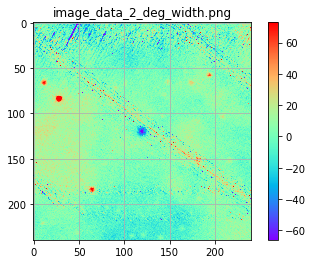

"\n\nsizeReduced = 120\n\n\nq_out1 = np.zeros(size)\nq_out2 = np.zeros(size)\nq_out3 = np.zeros(size)\nq_out  = np.zeros(size)\nq_out1 = sqtrim(image30arcmin, sizeReduced, q_out)\nq_out2 = sqtrim(image1deg, sizeReduced, q_out)\nq_out3 = sqtrim(image2deg, sizeReduced, q_out)\n\n\n\nplt.imshow(q_out1, vmax=vmax , vmin=vmin , cmap ='rainbow')\nplt.colorbar()\nplt.grid()\nplt.title('from_30arcmin_reduced_to_80.png')\n#plt.savefig('from_30arcmin_reduced_to_80.png')\nplt.show()\n\nplt.imshow(q_out2, vmax=vmax , vmin=vmin , cmap ='rainbow')\nplt.colorbar()\nplt.grid()\nplt.title('from_1deg_reduced_to_80.png')\n#plt.savefig('from_1deg_reduced_to_80.png')\nplt.show()\n\nplt.imshow(q_out3, vmax=vmax , vmin=vmin , cmap ='rainbow')\nplt.colorbar()\nplt.grid()\nplt.title('from_2deg_reduced_to_80.png')\n#plt.savefig('from_2deg_reduced_to_80.png')\nplt.show()\n\n\n\n\n\n"

In [13]:


#image = np.load('image_data_1deg.npy')
#image2deg = np.load('/Volumes/SANDISK32/clusters/image_data_2deg.npy')
#   image_data_2deg.npy
image = np.load('/Volumes/SANDISK32/clusters/image_data_2_deg_width.npy')
#image1deg = np.load('Stacked_fits/image_data_l_deg_fromPostageStampList.npy')
#image1deg = np.load('Stacked_fits/image_data_60arcmin_Planck100.npy')

#im30cross           = np.zeros(int(np.shape(image30arcmin)[0]))

def cross(ar, ar_out)    :
    centerx         = int(np.shape(ar)[0]/2)
    centery         = int(np.shape(ar)[1]/2)
    ar_out          = ar
    ar_out[centerx][centery-2:centery+2] = 1.e10
    i = -10
    while i < 10:
        ar_out[centerx + 1][centery] = 1.e10
        i += 1
   
    return (ar_out)
    
size = int(np.shape(image)[0])
#size = int(np.shape(image30arcmin)[0])
print (np.shape(image))
vmax = np.mean(image) + 2.* np.std(image)
vmin = np.mean(image) - 2.* np.std(image)
print ("vmax and vmin are: ", vmax, vmin)


## 
## put cross at center of each image:
## 
#imcross = np.zeros(size)
#imcross = cross(image, imcross)

plt.imshow(image, vmax=vmax , vmin=vmin , cmap ='rainbow')
plt.colorbar()
plt.grid()
plt.title('image_data_2_deg_width.png')
#plt.savefig('30arcmin_original.png')
plt.show()
'''
plt.imshow(image1deg, vmax=vmax , vmin=vmin , cmap ='rainbow')
plt.colorbar()
plt.grid()
plt.title('1deg_original.png')
plt.savefig('1deg_original.png')
plt.show()

plt.imshow(image2deg, vmax=vmax , vmin=vmin , cmap ='rainbow')
plt.colorbar()
plt.grid()
plt.title('2deg_original.png')
#plt.savefig('2deg_original.png')
plt.show()

'''






'''

sizeReduced = 120


q_out1 = np.zeros(size)
q_out2 = np.zeros(size)
q_out3 = np.zeros(size)
q_out  = np.zeros(size)
q_out1 = sqtrim(image30arcmin, sizeReduced, q_out)
q_out2 = sqtrim(image1deg, sizeReduced, q_out)
q_out3 = sqtrim(image2deg, sizeReduced, q_out)



plt.imshow(q_out1, vmax=vmax , vmin=vmin , cmap ='rainbow')
plt.colorbar()
plt.grid()
plt.title('from_30arcmin_reduced_to_80.png')
#plt.savefig('from_30arcmin_reduced_to_80.png')
plt.show()

plt.imshow(q_out2, vmax=vmax , vmin=vmin , cmap ='rainbow')
plt.colorbar()
plt.grid()
plt.title('from_1deg_reduced_to_80.png')
#plt.savefig('from_1deg_reduced_to_80.png')
plt.show()

plt.imshow(q_out3, vmax=vmax , vmin=vmin , cmap ='rainbow')
plt.colorbar()
plt.grid()
plt.title('from_2deg_reduced_to_80.png')
#plt.savefig('from_2deg_reduced_to_80.png')
plt.show()





'''



In [21]:
# computes distance in pixels from the center of a square array, 118x118 pixels
# coordinates in pixels (x,y) are the indices of the array of the image;
# they need to be transformed into distances along the axes from the center of the image
# returns distance in pixels from the center to pixel (x,y)
# xc and yc are the center points, from which the distances are calculated

def distance(x,y):
#    xc = halfsize - 0.5
#    yc = halfsize - 0.5
    xc = size/2 
    yc = size/2
    
   
    distance = math.sqrt( (x-xc)**2 + (y-yc)**2 )
    return distance



In [22]:
points           = 10
pixParcmin       = 120./60.
clicksPer5arcmin =   (120./60.) * 5.
print ("clicksPer5arcmin = ", clicksPer5arcmin)
print ("pixParcmin = ", pixParcmin)
integrated       = np.zeros(points)

mn               = np.zeros(points)
sd               = np.zeros(points)

#av               = np.zeros(points)
n_pts            = np.zeros(points)
kk               = 1
# k is the counter for the concentric rings
# each ring is 1/12 of the max. radius, which we set to 48 pixels; that is, 50/4 = 12 rings
# each ring is 5 pixels in delta-radius
# most distant ring is 24*5 =  pixels in radius from center
# 
# pts is the one dimensional array holding the points in a particular annulus
# after each set of annulus points is assembled, the mean and standard deviation of that particular annulus 
# is calculated for plotting.

#print (kk)
#print (points)
#print ('mn = ',mn)
#print ('sd = ', sd)
#print ('size = ', size)


clicksPer5arcmin =  10.0
pixParcmin =  2.0


size =  240
distance array:   [ 2.5]
distance =  2.5
kk =  1    distInPix =  5.0    pixPring =  5.0  distInPix/pixParcmin =   2.5 distance at outside of ring = 2.5 arc min


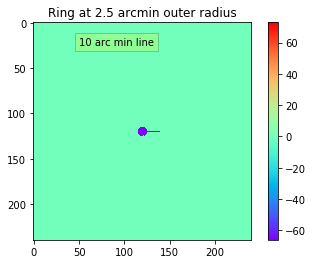

Number of points in this annulus 68
    min value -83.3536827576  max value 3.04353684077

 min frequency  0.0     max frequency  8.0


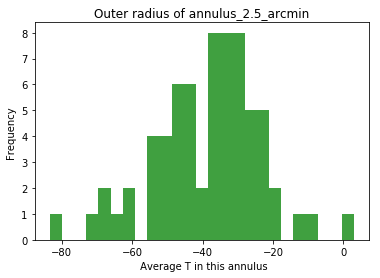

distance array:   [ 2.5  5. ]
distance =  5.0
kk =  2    distInPix =  10.0    pixPring =  5.0  distInPix/pixParcmin =   5.0 distance at outside of ring = 5.0 arc min


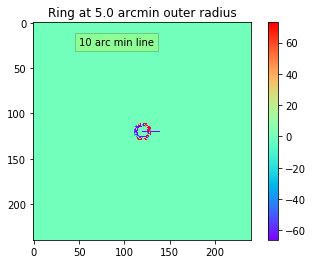

Number of points in this annulus 224
    min value -631.683422975  max value 54.4701372332

 min frequency  0.0     max frequency  128.0


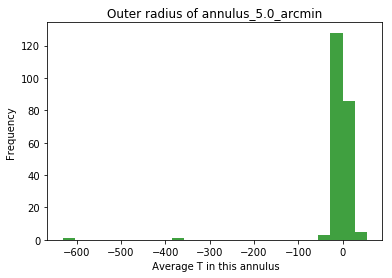

distance array:   [ 2.5  5.   7.5]
distance =  7.5
kk =  3    distInPix =  15.0    pixPring =  5.0  distInPix/pixParcmin =   7.5 distance at outside of ring = 7.5 arc min


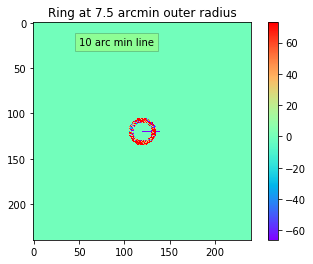

Number of points in this annulus 380
    min value -1208.22666121  max value 720.597943988

 min frequency  0.0     max frequency  361.0


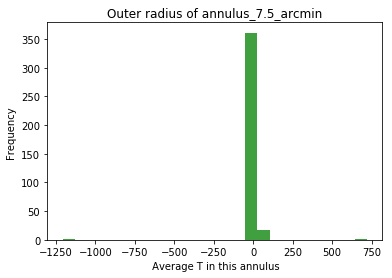

distance array:   [  2.5   5.    7.5  10. ]
distance =  10.0
kk =  4    distInPix =  20.0    pixPring =  5.0  distInPix/pixParcmin =   10.0 distance at outside of ring = 10.0 arc min


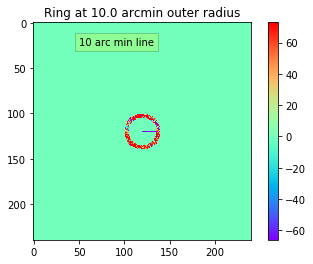

Number of points in this annulus 536
    min value -1106.94171362  max value 69.1650309266

 min frequency  0.0     max frequency  500.0


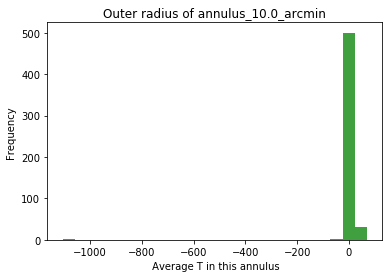

distance array:   [  2.5   5.    7.5  10.   12.5]
distance =  12.5
kk =  5    distInPix =  25.0    pixPring =  5.0  distInPix/pixParcmin =   12.5 distance at outside of ring = 12.5 arc min


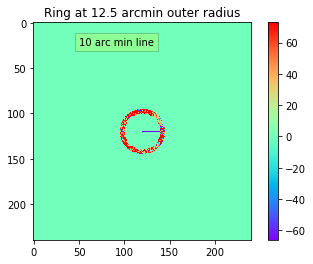

Number of points in this annulus 684
    min value -122.706902243  max value 655.511283327

 min frequency  0.0     max frequency  516.0


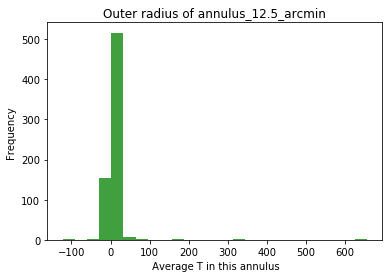

distance array:   [  2.5   5.    7.5  10.   12.5  15. ]
distance =  15.0
kk =  6    distInPix =  30.0    pixPring =  5.0  distInPix/pixParcmin =   15.0 distance at outside of ring = 15.0 arc min


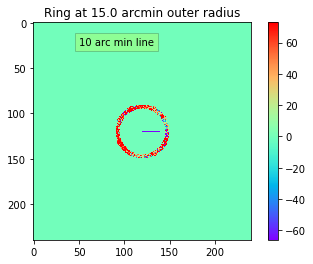

Number of points in this annulus 848
    min value -49.5654718394  max value 148.264404791

 min frequency  0.0     max frequency  352.0


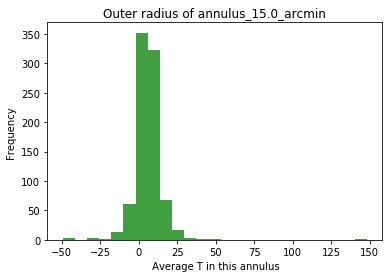

distance array:   [  2.5   5.    7.5  10.   12.5  15.   17.5]
distance =  17.5
kk =  7    distInPix =  35.0    pixPring =  5.0  distInPix/pixParcmin =   17.5 distance at outside of ring = 17.5 arc min


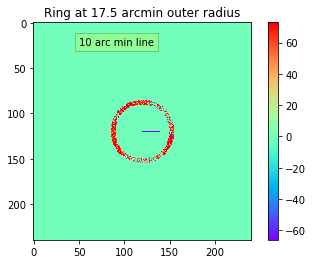

Number of points in this annulus 1020
    min value -894.180502614  max value 66.1616894032

 min frequency  0.0     max frequency  992.0


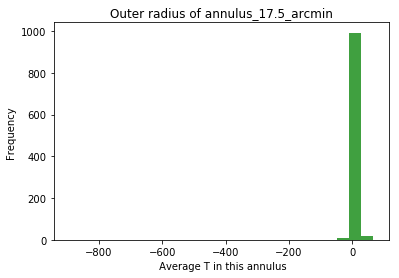

distance array:   [  2.5   5.    7.5  10.   12.5  15.   17.5  20. ]
distance =  20.0
kk =  8    distInPix =  40.0    pixPring =  5.0  distInPix/pixParcmin =   20.0 distance at outside of ring = 20.0 arc min


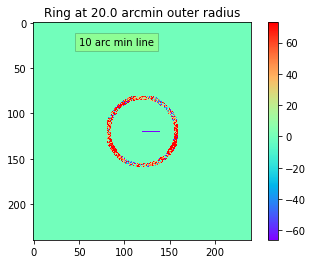

Number of points in this annulus 1160
    min value -250.427038021  max value 85.2990714726

 min frequency  0.0     max frequency  556.0


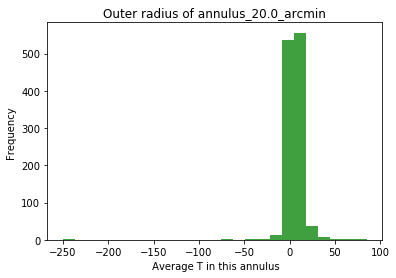

distance array:   [  2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5]
distance =  22.5
kk =  9    distInPix =  45.0    pixPring =  5.0  distInPix/pixParcmin =   22.5 distance at outside of ring = 22.5 arc min


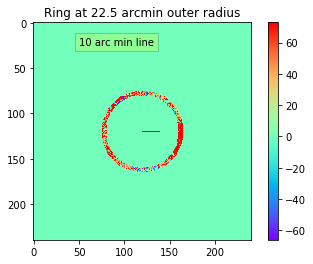

Number of points in this annulus 1324
    min value -24.1186349835  max value 71.6634119716

 min frequency  0.0     max frequency  354.0


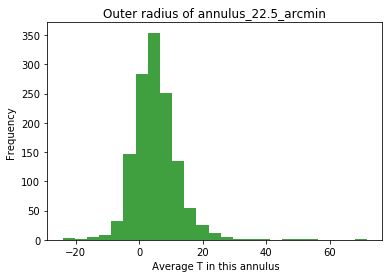

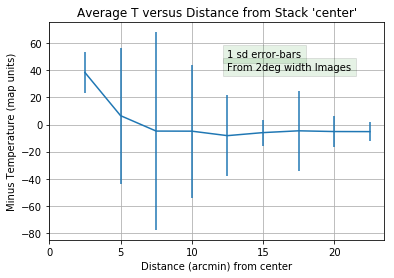

In [24]:
kk =  1
av               = np.zeros(points)
integrated       = np.zeros(points)

mn               = np.zeros(points)
sd               = np.zeros(points)

av               = np.zeros(points)
n_pts            = np.zeros(points)
dis              = np.zeros(0)

## 
## plot each ring
## ring is an array with the respective points within that annulus
##


print ('size = ', size)

pixPring = 5.

ww = open('Cluster_plots/fig_captions_5pixRing.txt', 'w')

while kk < points :
    print ("========================================================")
    i = 0
    ring = np.zeros((size,size))
##  create measurement bar 20 pixels long = 10 arc min
##
    
    xc = int(size/2) 
    yc = int(size/2)
    ir = xc
    while ir < xc + 20:
        ring[yc][ir] = -1.0e6
        ir += 1
##        
##
## kk will be incremented by one integer at a time.   The distance along each axix is 
## kk/pixParcmin. 
## 
    distInPix = pixPring*kk
    dArcmin   = distInPix/pixParcmin
    dis = np.append(dis, dArcmin)
    print ("distance array:  ", dis)
    print ("distance = ", dArcmin)
    write1 = "distance at outside of ring = " + str(distInPix/pixParcmin) +  " arc min"
    print ("kk = ", kk,  "   distInPix = ", distInPix, "   pixPring = ", pixPring," distInPix/pixParcmin =  ", distInPix/pixParcmin ,write1)
    
    
    ww.write(write1)
    ww.write('\n')
    nPts = 0
    pts  = np.zeros(0)

    while i < size:
        j = 0
        

        while j < size:
            if (distance(i,j) >  (kk-1)*pixPring) and (distance(i,j) < kk*pixPring) : 
                nPts += 1
                pts = np.append(pts,image[i][j])
                ring[i][j] = image[i][j]
#                print (' image value = ', image[i][j])
#                integrated[kk] = integrated[kk] + image[i][j]
            j += 1
        i += 1
        
#    print ("outside ring distance = ", kk*20/4, "\n number of pts = ", int(np.shape(pts)[0]))
#    print (" nPts = ", nPts)
# average integrated values over number of points in the ring (n_pts) 
#    av[kk] = integrated[kk]/nPts
#    print ('integrated ', integrated[kk], '    number of points ', nPts,"  av.int'd  ", av[kk])
    
    
#    print ('number of points in annulus kk = ', kk, '  ', int(np.shape(pts) )
           
           
#    print ('mean(pts) = ',  mn[kk], '   std(pts)  ', sd[kk])
    mn[kk]   = np.mean(pts)
    sd[kk]   = np.std(pts)
   
   
    distanceString = str(dArcmin)
    
    fig = plt.imshow(10.*ring, vmax = vmax, vmin = vmin, cmap = 'rainbow')
    plt.text(50., 25., "10 arc min line", fontsize=10, bbox=dict(facecolor='yellow', alpha=0.2) )
    plt.colorbar()
    plt.title("Ring at "+ distanceString + " arcmin outer radius")
    plt.savefig('Cluster_plots/Ring_'+ distanceString + '_arcmin_outer_radius.png')
    plt.show()
    
    n_bins = 25
#    print ("bins = ", n_bins)
    n, bins, patches = plt.hist(pts, n_bins, facecolor='g', alpha=0.75)
    plt.xlabel(' Average T in this annulus')
    plt.ylabel('Frequency ')
   
    distanceText = str( 'Outer radius of annulus_' + distanceString + '_arcmin')
#    xpos = np.min(pts)* 1.2
#    ypos = np.max(pts)* .30
#    plt.text(xpos, ypos, distanceText, fontsize=10, bbox=dict(facecolor = 'green', alpha = 0.1) )
    write2 = "Number of points in this annulus " + str(nPts) + "\n    min value " + str(np.min(pts)) + "  max value "+ str(np.max(pts))+'\n'
    ww.write(write2)
    print (write2)
#    print ("min value " , np.min(pts), "     max value ", np.max(pts))
    write3 = "\n min frequency "+ str(np.min(n))+ "    max frequency " + str(np.max(n)) + "\n\n\n"
    print (" min frequency ", np.min(n),  "    max frequency ",  np.max(n))
    ww.write(write3)
    plt.title(distanceText)
    plt.savefig('Cluster_plots/histogram_'+ distanceText + '_5pixPring.png')
    plt.show()
    
    print ('========================================================')
    ww.write('=====================================================\n\n')
    kk = kk + 1




m = np.arange(points)

 
# convert pixels to arcmin.; use 240 pixels per 60 arcmin, 
# m is the number of pixels corresponding to 5 arc min approx.


m = m*pixPring/pixParcmin  

m = m -1.


#print ("pix per arc min = ", pixParcmin)
#print  (5/(240./60.), 'arc min' )

#print (" dist per m unit in arc min ", m)

# calculate the average between the limits of the x-axis values (m); 
# use these as the new a-axis:

#plt.errorbar(m[1:], -av[1:],sd[1:] )

#plt.title('Averge vs. Distance from Center')
#plt.xlabel("Distance (arcmin) from center")
#plt.ylabel("Minus Temperature (map units)")
#plt.axis( xmin = 0.00)
#plt.grid()
#plt.show()

#print np.shape(mn[1:]),  np.shape(m), np.shape(sd[1:])
#plt.errorbar(m[1:], -mn[1:],sd[1:])
plt.errorbar(dis, -mn[1:], sd[1:])

#plt.errorbar(dis[1:], -mn[1:], sd[1:])
plt.title("Average T versus Distance from Stack 'center'")
plt.xlabel("Distance (arcmin) from center")
plt.ylabel("Minus Temperature (map units)")
plt.axis(xmin= 0.00)
plt.text(12.5, 50, '1 sd error-bars',fontsize=10, bbox=dict(facecolor='green', alpha=0.1))
plt.text(12.5,40,'From 2deg width Images', fontsize=10, bbox=dict(facecolor = 'green', alpha = 0.1))
plt.grid()
plt.savefig('Cluster_plots/StackProfile_5pixPring.png')
plt.show()

ww.close()


In [46]:
import math as m


s = 72
s1 = int(m.sqrt(s))
qB = np.ones(s)
q = np.arange(s)
print(" shape of q is "  , np.shape(q))



q = q.reshape((s1,s1+1))
print ('Starting array ...\n', q)

horsize = int(np.shape(q)[1])
versize = int(np.shape(q)[0])

print (' horsize  ', horsize,  '     versize ', versize)
diff = horsize - versize
print ('  diff =  ',  diff)

if horsize != versize : print (" not square   \n")

if horsize > versize:
    gsq = np.arange(horsize-1, horsize - diff -1, -1)
    print ('gsq   ', gsq)
    q = np.delete(q, gsq, 1)
    
if horsize < versize:
    gsq = np.arange(versize-1, versize-diff-1, -1)
    print ('gsq   ', gsq)
    q = np.delete(q, gsq, 1)
print ('squared array:  \n', q)
print (' shape of squared array =  ', np.shape(q),'\n\n')
                  
print ('    ')

newSize =   4
print ("DESIRED NEW SIZE = ", newSize ,"\n\n")
offEachSide = int( .5 * ( s1 - newSize))

gg = np.arange(offEachSide)

print ('gg = ', gg)
q2 = np.delete(q,gg,0)
print('\n deleted \n', q2)

print (' shape of q2: \n', np.shape(q2))
bottomRow = int(np.shape(q2)[0])
print ('bottomRow = ', bottomRow)

gb = np.arange(bottomRow-1, bottomRow-offEachSide-1, -1)
print ('gb ', gb)

q2 = np.delete(q2, gb, 0)
print (' next transformation of q2: \n', q2)
    
    

print ('\n  Should be desired height   \n', q2)



q3 = np.delete(q2, gg, 1)
print ('\n  deleted from the right:  \n', q3)

q4 = np.delete(q3, gb,1)
print ('\n deleted  from the left:  \n', q4)

print (' shape of q4 is  \n', np.shape(q4))
#qB  = trim(q, 3, qB )

#print(" output ....\n", qB)




 shape of q is  (72,)
Starting array ...
 [[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]
 [18 19 20 21 22 23 24 25 26]
 [27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44]
 [45 46 47 48 49 50 51 52 53]
 [54 55 56 57 58 59 60 61 62]
 [63 64 65 66 67 68 69 70 71]]
 horsize   9      versize  8
  diff =   1
 not square   

gsq    [8]
squared array:  
 [[ 0  1  2  3  4  5  6  7]
 [ 9 10 11 12 13 14 15 16]
 [18 19 20 21 22 23 24 25]
 [27 28 29 30 31 32 33 34]
 [36 37 38 39 40 41 42 43]
 [45 46 47 48 49 50 51 52]
 [54 55 56 57 58 59 60 61]
 [63 64 65 66 67 68 69 70]]
 shape of squared array =   (8, 8) 


    
DESIRED NEW SIZE =  4 


gg =  [0 1]

 deleted 
 [[18 19 20 21 22 23 24 25]
 [27 28 29 30 31 32 33 34]
 [36 37 38 39 40 41 42 43]
 [45 46 47 48 49 50 51 52]
 [54 55 56 57 58 59 60 61]
 [63 64 65 66 67 68 69 70]]
 shape of q2: 
 (6, 8)
bottomRow =  6
gb  [5 4]
 next transformation of q2: 
 [[18 19 20 21 22 23 24 25]
 [27 28 29 30 31 32 33 34]
 [36 37 38 39 40 41 42 43]

In [3]:
##
## trims a square array q by one row and one column from the right and the bottom, 
## returning qt
##


def trim(q, newsize, qt):
    
    origLen = np.shape(q)[0]
    origWidth = np.shape(q)[1]
    print (origLen, origWidth)
    q = np.resize(q, (newsize,origWidth))
#    print (np.shape(q)[0], '...  ', np.shape(q[1]))
#    print ('resized:  \n', q)

    q2 = q.swapaxes(1,0)
#    print ("swapped \n", q2)

    q3 = np.resize(q2, (newsize,newsize))
#    print ('resized ...\n', q3)
    qt = q3.swapaxes(1,0)
#    print('result is...\n', qt)

    return qt

(240, 240)


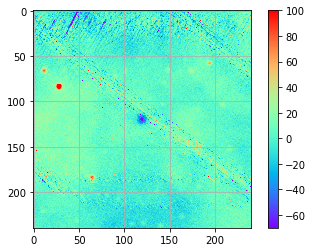

In [10]:
import numpy as np
import matplotlib.pyplot as plt
im = np.load('/Volumes/SANDISK32/clusters/image_data_2_deg_width.npy')

print (np.shape(im))

plt.imshow(im, vmax = 100, vmin = -70, cmap = 'rainbow')
plt.colorbar()
plt.grid()
plt.show()




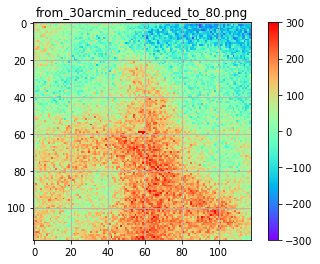

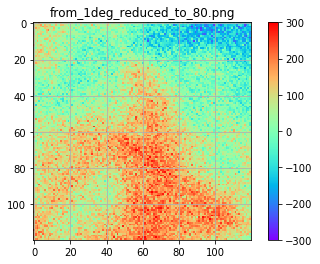

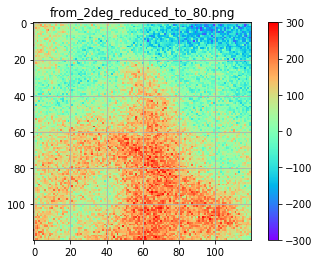

In [13]:
plt.imshow(q_out1, vmax=vmax , vmin=vmin , cmap ='rainbow')
plt.colorbar()
plt.grid()
plt.title('from_30arcmin_reduced_to_80.png')
plt.savefig('from_30arcmin_reduced_to_80.png')
plt.show()

plt.imshow(q_out2, vmax=vmax , vmin=vmin , cmap ='rainbow')
plt.colorbar()
plt.grid()
plt.title('from_1deg_reduced_to_80.png')
plt.savefig('from_1deg_reduced_to_80.png')
plt.show()

plt.imshow(q_out3, vmax=vmax , vmin=vmin , cmap ='rainbow')
plt.colorbar()
plt.grid()
plt.title('from_2deg_reduced_to_80.png')
plt.savefig('from_2deg_reduced_to_80.png')
plt.show()



In [75]:
xz = np.zeros(2)
xz = np.append(xz, 34.)
xz = np.append(xz, 38.)
print(" xz = ", xz)

 xz =  [  0.   0.  34.  38.]


In [115]:
bvv = open('Cluster_plots/testwrite.txt', 'w')
bvv.write('Hello world')
bvv.close()